In [16]:
import numpy as np
from pathlib import Path
import random
import tifffile as tiff
from matplotlib import pyplot as plt
import cv2

#### Import data

In [17]:
#load data (6,7,8,9,10,11,12,13,14,15,16,17,21,22,23,24,26,27,28,29,31,32,33,35)
pr_num=12

file_amplitude_path = Path(fr'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\03_UT_data\Panel PEGASO\probetas\1\{pr_num}\{pr_num}_lente_amplitude.tif')
ut_volume_amplitude = tiff.imread(file_amplitude_path)

#Dimensions
z= ut_volume_amplitude.shape[0]
y= ut_volume_amplitude.shape[1]
x= ut_volume_amplitude.shape[2]

#Print dimensions
print('size (x,y,z):',x,y,z)
print(ut_volume_amplitude.shape)

size (x,y,z): 45 136 400
(400, 136, 45)


#### B-scan YZ

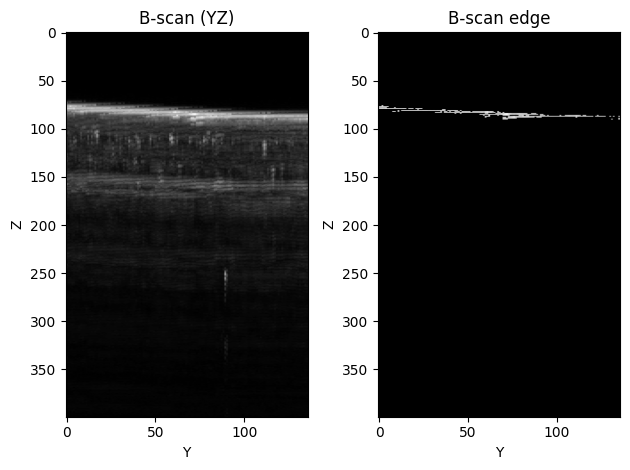

In [18]:
#B-scan obtention
b_scan_yz=np.max(ut_volume_amplitude, axis=2)

#Edge detection
mask = (b_scan_yz > 100).astype(np.uint8) * 255 #Create boolean mask
bscan_yz_uint8 = b_scan_yz.astype(np.uint8)
bscan_mask = cv2.bitwise_and(bscan_yz_uint8, bscan_yz_uint8, mask=mask) #Apply mask

# Visualization
plt.figure

plt.subplot(1,2,1)
plt.imshow(b_scan_yz, cmap='gray', aspect='auto')
plt.title('B-scan (YZ)')
plt.xlabel('Y')
plt.ylabel('Z')

plt.subplot(1,2,2)
plt.imshow(bscan_mask, cmap='gray', aspect='auto')
plt.title('B-scan edge')
plt.xlabel('Y')
plt.ylabel('Z')

plt.tight_layout()  
plt.show()


#### Compute inclination YZ

In [19]:
ys, xs = np.where(bscan_mask > 0)  # white pixels coordinates

# Fit staright line: y = m*x + b
A = np.vstack([xs, np.ones_like(xs)]).T
m, b = np.linalg.lstsq(A, ys, rcond=None)[0]

# Calculate slope angle
angle_rad = np.arctan(m)
angle_deg_YZ = np.degrees(angle_rad)

#### B-scan XZ

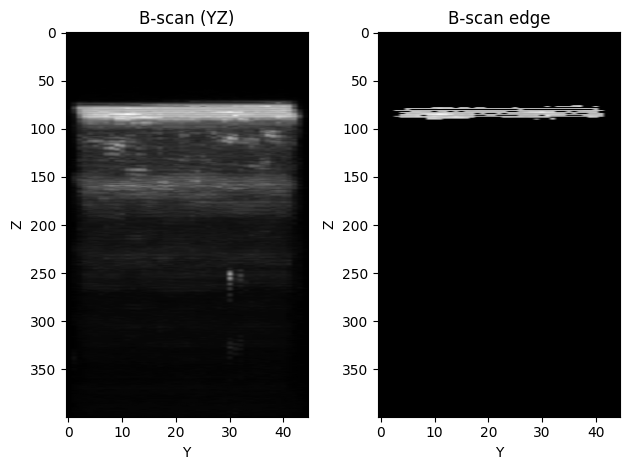

In [20]:
#B-scan obtention
b_scan_xz=np.max(ut_volume_amplitude, axis=1)

#Edge detection
mask = (b_scan_xz > 100).astype(np.uint8) * 255 #Create boolean mask
bscan_xz_uint8 = b_scan_xz.astype(np.uint8)
bscan_mask = cv2.bitwise_and(bscan_xz_uint8, bscan_xz_uint8, mask=mask) #Apply mask

# Visualization
plt.figure

plt.subplot(1,2,1)
plt.imshow(b_scan_xz, cmap='gray', aspect='auto')
plt.title('B-scan (YZ)')
plt.xlabel('Y')
plt.ylabel('Z')

plt.subplot(1,2,2)
plt.imshow(bscan_mask, cmap='gray', aspect='auto')
plt.title('B-scan edge')
plt.xlabel('Y')
plt.ylabel('Z')

plt.tight_layout()  
plt.show()


#### Compute inclination XZ

In [ ]:
ys, xs = np.where(bscan_mask > 0)  # white pixels coordinates

# Fit staright line: y = m*x + b
A = np.vstack([xs, np.ones_like(xs)]).T
m, b = np.linalg.lstsq(A, ys, rcond=None)[0]

# Calculate slope angle
angle_rad = np.arctan(m)
angle_deg_XZ = np.degrees(angle_rad)

##### Results

In [22]:
print(f"Aprox inclination YZ: {angle_deg_YZ:.2f}°")
print(f"Aprox inclination XZ: {angle_deg_XZ:.2f}°")

Aprox inclination YZ: 4.57°
Aprox inclination XZ: -2.12°
